In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# Load the Titanic dataset
df = pd.read_csv("task1_Titanic-Dataset.csv")

In [27]:
# Show basic structure and column data types
df.info()
df.describe(include='all')
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
# Drop columns that are not useful for prediction or have too many missing/unique values
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [29]:
# Identify numerical columns (excluding the target variable 'Survived')
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols.remove('Survived')
print("Numerical Columns:", numerical_cols)

Numerical Columns: ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


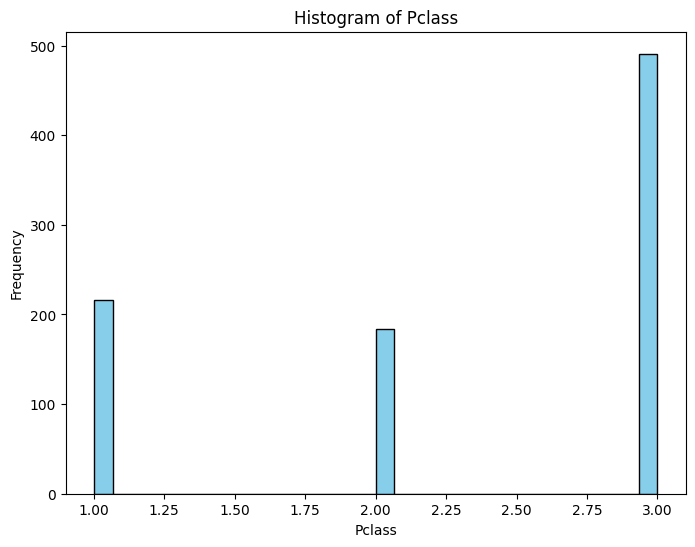

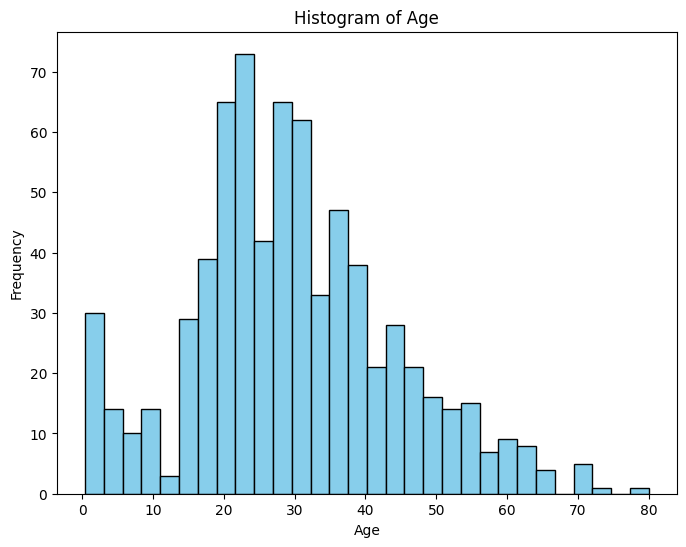

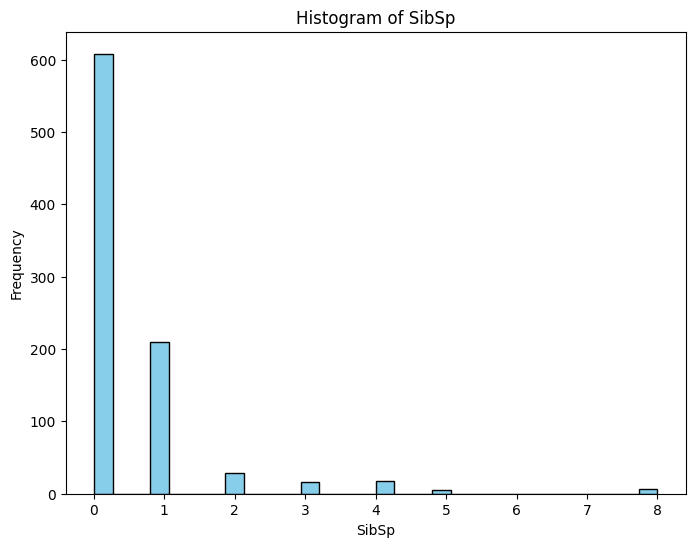

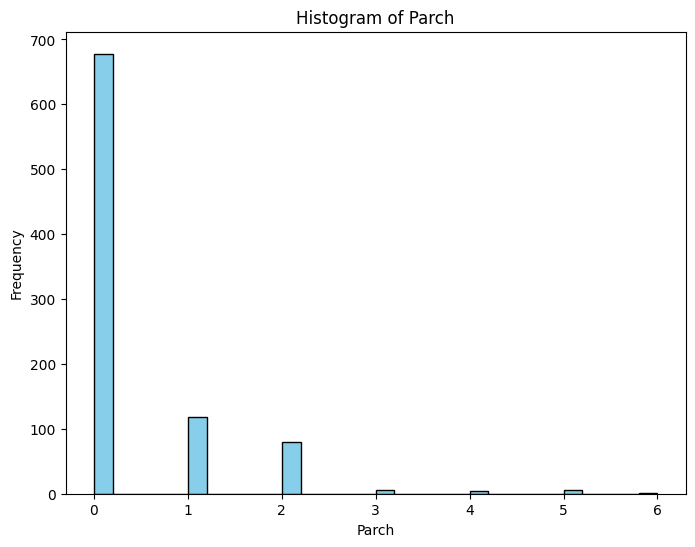

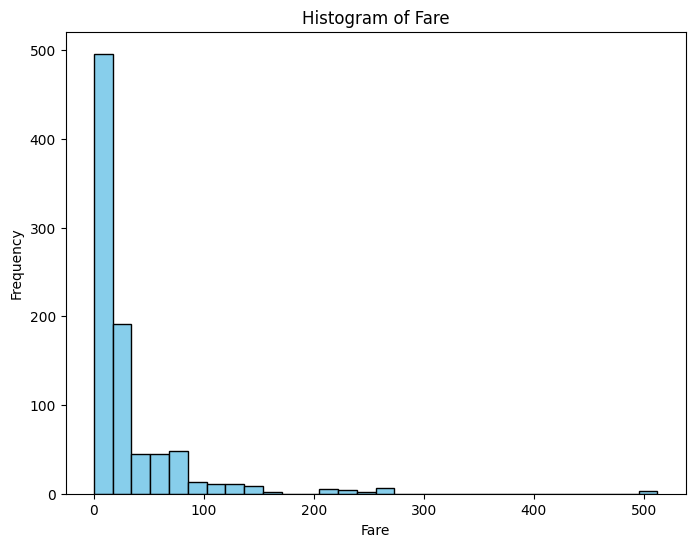

In [30]:
# Plot histograms for each numerical column to understand distributions
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    plt.hist(df[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

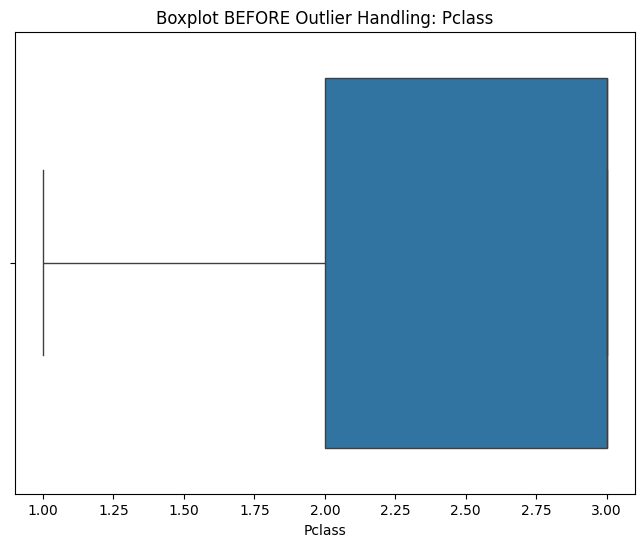

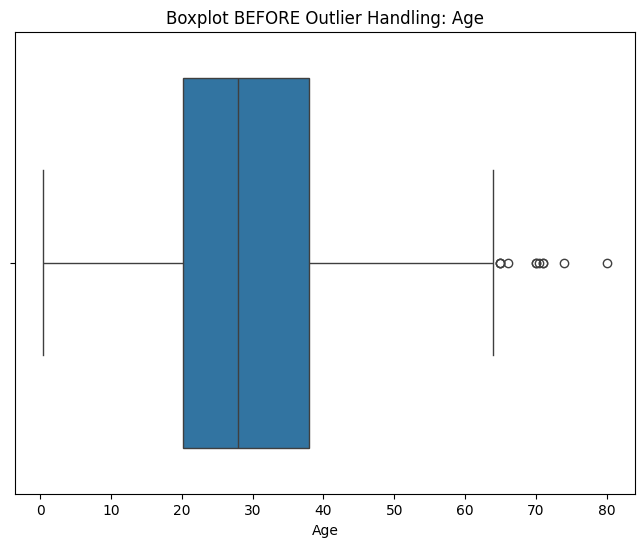

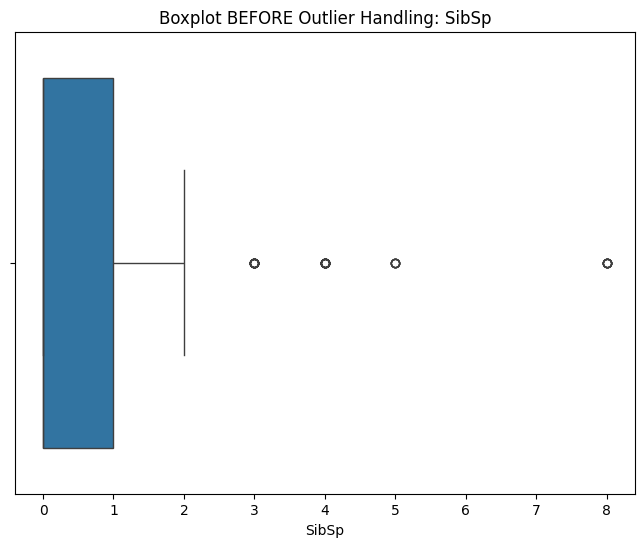

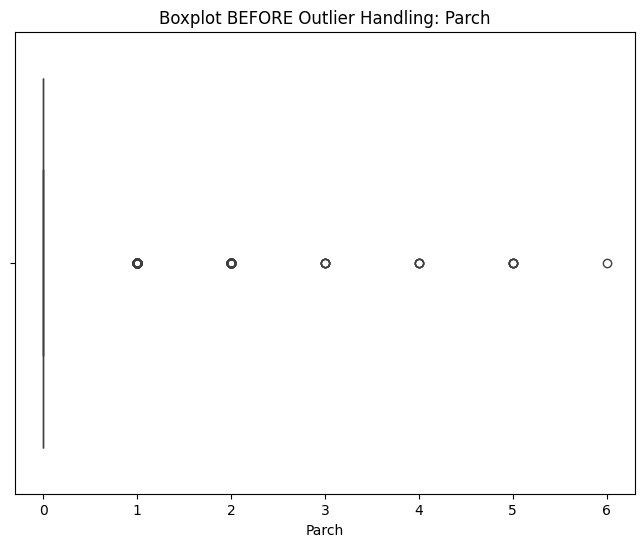

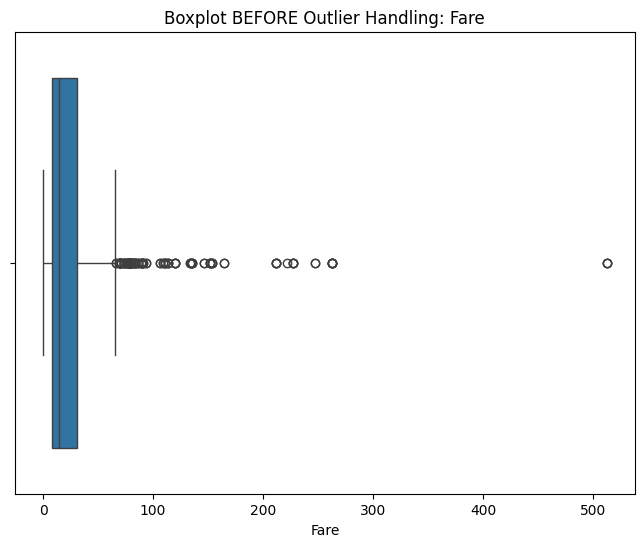

In [31]:
# Plot boxplots to detect outliers in numerical columns (before handling)
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot BEFORE Outlier Handling: {col}")
    plt.show()

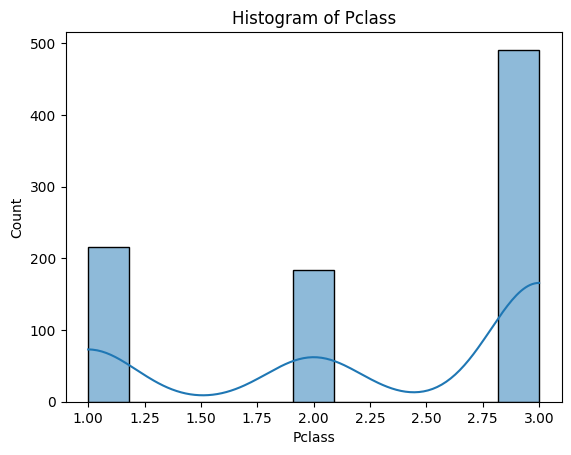

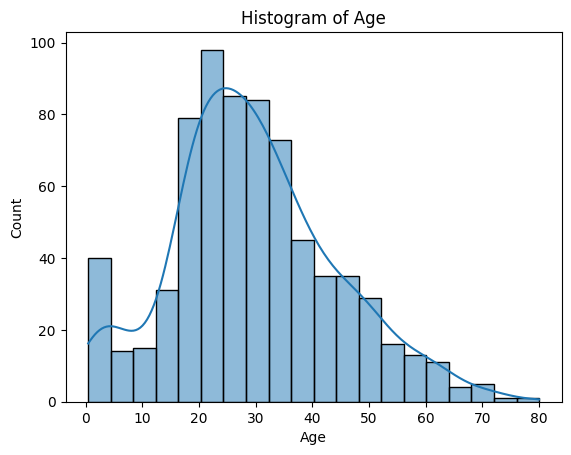

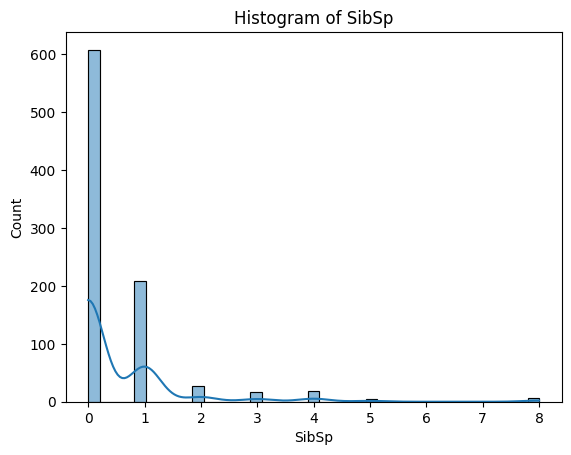

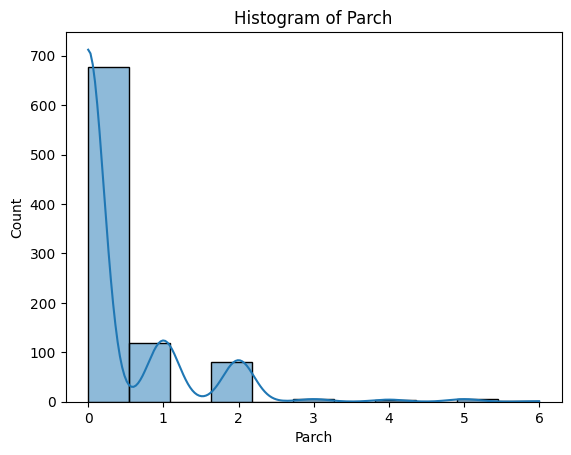

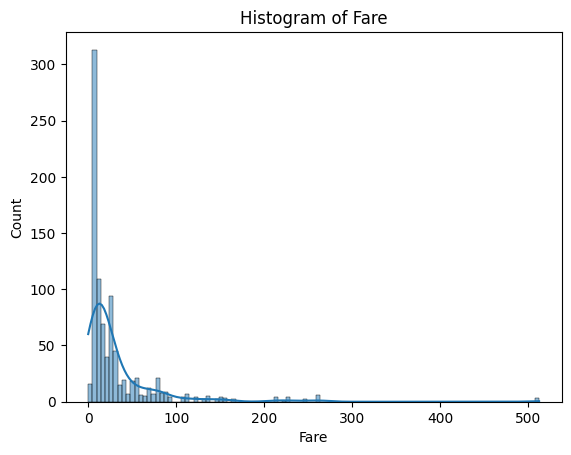

In [32]:
for col in numerical_cols:
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f"Histogram of {col}")
    plt.show()

In [33]:
# Summary statistics for numerical features
summary_stats = df[numerical_cols].describe().T
summary_stats['median'] = df[numerical_cols].median()
print(summary_stats)

        count       mean        std   min      25%      50%   75%       max  \
Pclass  891.0   2.308642   0.836071  1.00   2.0000   3.0000   3.0    3.0000   
Age     714.0  29.699118  14.526497  0.42  20.1250  28.0000  38.0   80.0000   
SibSp   891.0   0.523008   1.102743  0.00   0.0000   0.0000   1.0    8.0000   
Parch   891.0   0.381594   0.806057  0.00   0.0000   0.0000   0.0    6.0000   
Fare    891.0  32.204208  49.693429  0.00   7.9104  14.4542  31.0  512.3292   

         median  
Pclass   3.0000  
Age     28.0000  
SibSp    0.0000  
Parch    0.0000  
Fare    14.4542  


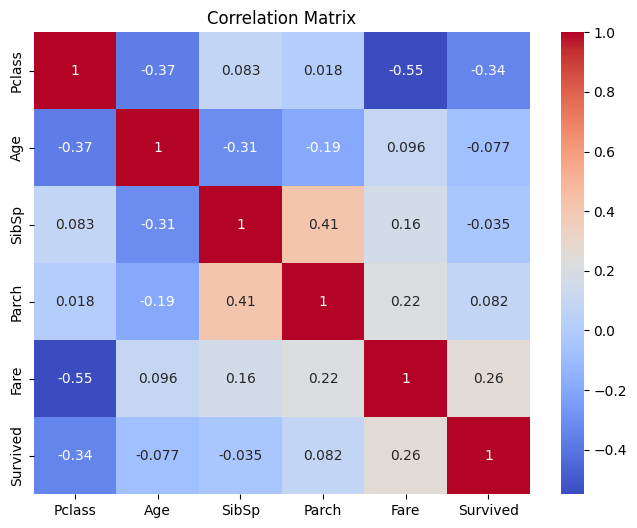

In [34]:
# Correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df[numerical_cols + ['Survived']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

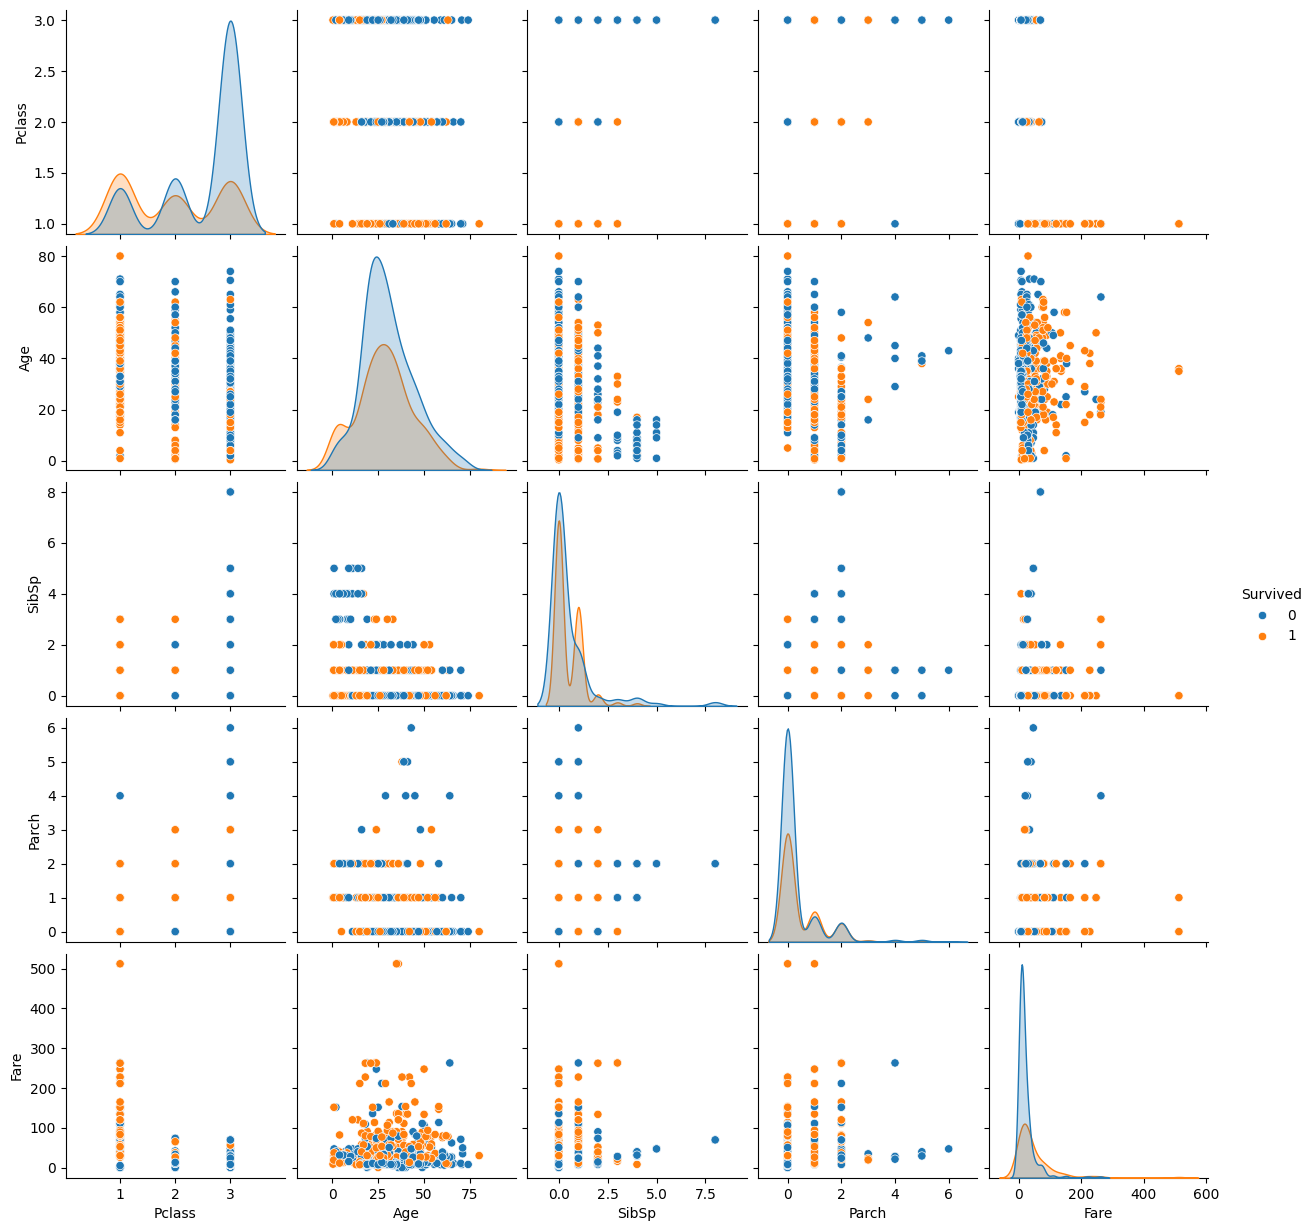

In [35]:
# Pairplot
sns.pairplot(df[numerical_cols + ['Survived']], hue='Survived')
plt.show()

In [36]:
# Apply IQR method to cap outliers in each numerical column
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])

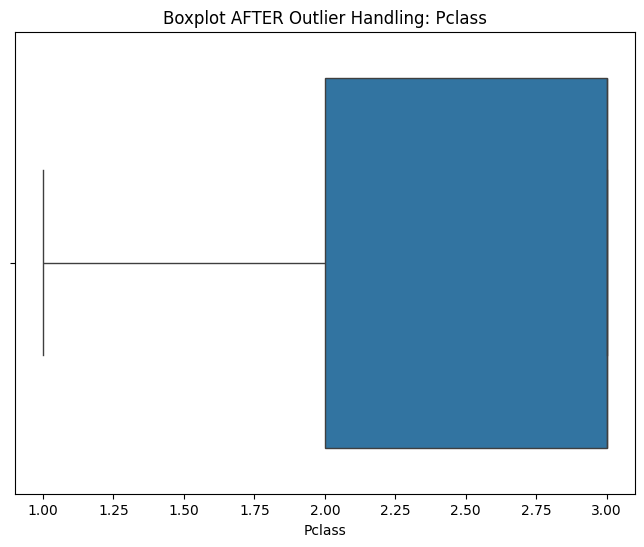

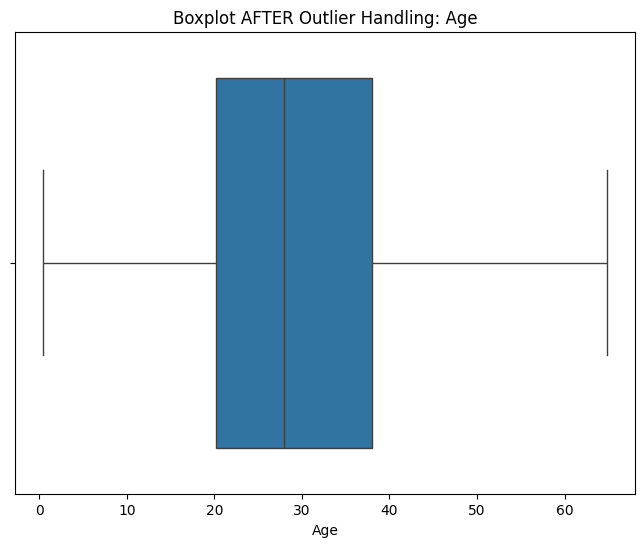

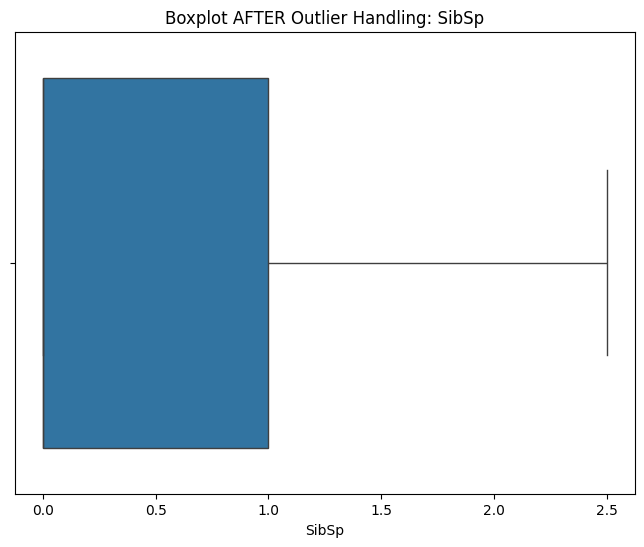

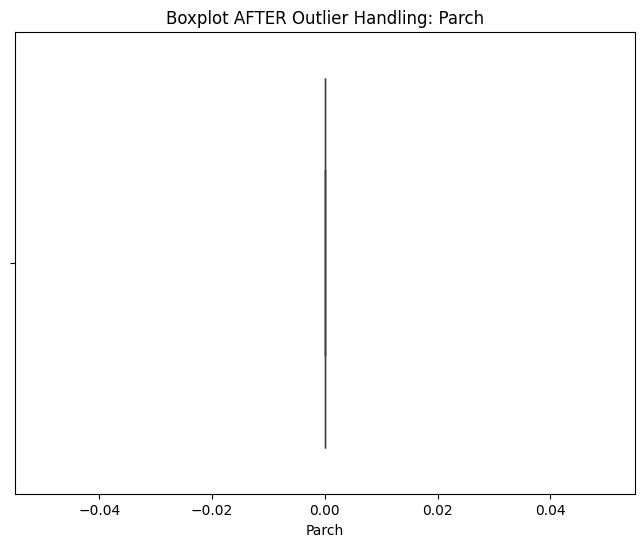

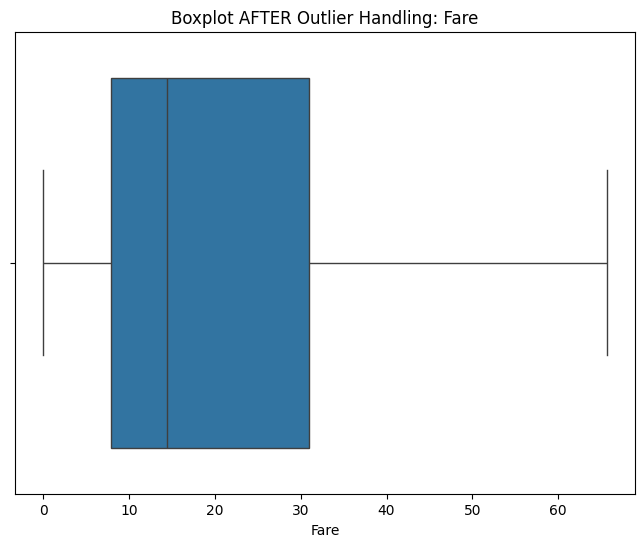

In [37]:
# Plot boxplots again to verify that outliers have been capped
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot AFTER Outlier Handling: {col}")
    plt.show()

In [38]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=["object"]).columns.tolist()
print("Categorical Columns:", categorical_columns)

Categorical Columns: ['Sex', 'Embarked']


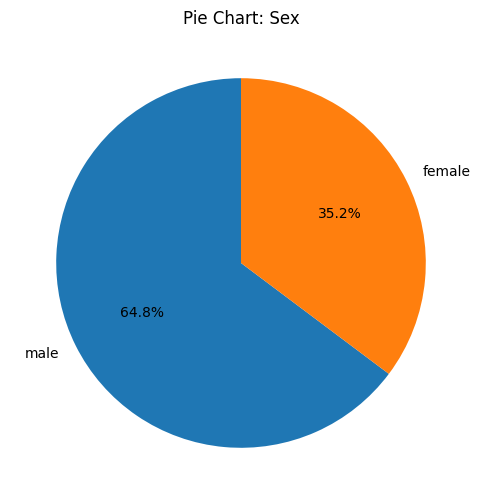

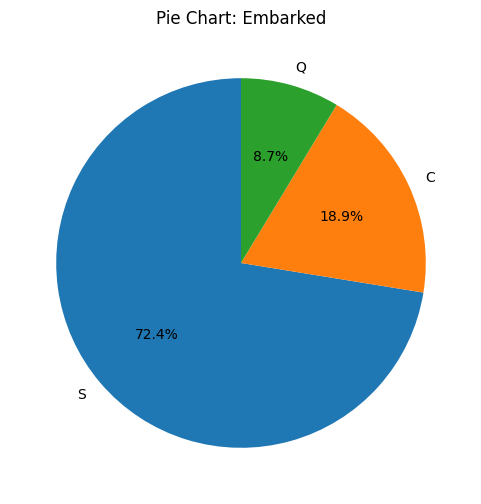

In [39]:
# Plot pie charts to visualize the distribution of categories
for col in categorical_columns:
    plt.figure(figsize=(6, 6))
    df[col].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
    plt.title(f"Pie Chart: {col}")
    plt.ylabel('')
    plt.show()

In [40]:
# Display number of missing values before handling
print(df.isnull().sum())

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64


In [41]:
# Fill missing values in numerical columns with the median
for col in numerical_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].median())

# Fill missing values in categorical columns with the most frequent value (mode)
for col in categorical_columns:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mode()[0])

In [42]:
# Check again to ensure no missing values remain
print(df.isnull().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


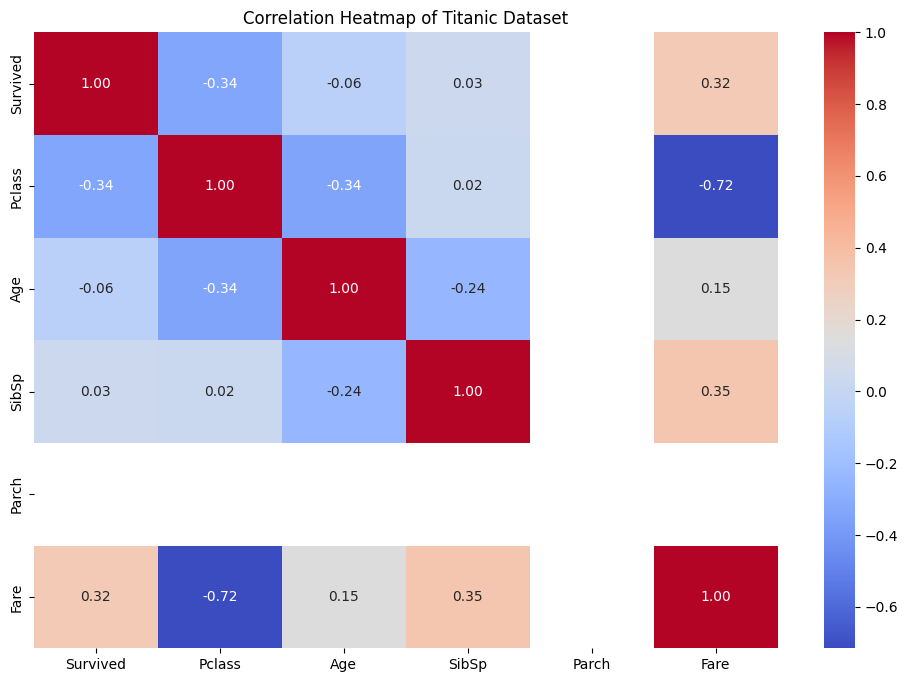

In [43]:
# Create a correlation heatmap for numerical features
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Titanic Dataset')
plt.show()

In [44]:
# Print the covariance matrix of numeric columns
cov_matrix = df.cov(numeric_only=True)
print("Covariance Matrix:\n", cov_matrix)

Covariance Matrix:
           Survived     Pclass         Age     SibSp  Parch        Fare
Survived  0.236772  -0.137703   -0.404759  0.010833    0.0    3.163576
Pclass   -0.137703   0.699015   -3.660711  0.013726    0.0  -12.248875
Age      -0.404759  -3.660711  164.623457 -2.217302    0.0   38.223448
SibSp     0.010833   0.013726   -2.217302  0.501612    0.0    5.071522
Parch     0.000000   0.000000    0.000000  0.000000    0.0    0.000000
Fare      3.163576 -12.248875   38.223448  5.071522    0.0  419.496943


In [45]:
# Encode categorical variables using Label Encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

In [46]:
# Standardize the numerical features using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [47]:
# Show that data is now standardized (mean ~0, std ~1)
df[numerical_cols].describe()

,Pclass,Age,SibSp,Parch,Fare
count,8.910000e+02,8.910000e+02,8.910000e+02,891.0,8.910000e+02
mean,-8.772133e-17,2.232906e-16,1.196200e-17,0.0,9.968332e-17
std,1.000562e+00,1.000562e+00,1.000562e+00,0.0,1.000562e+00
min,-1.566107e+00,-2.252166e+00,-6.025120e-01,0.0,-1.174727e+00
25%,-3.693648e-01,-5.693003e-01,-6.025120e-01,0.0,-7.882908e-01
50%,8.273772e-01,-1.014044e-01,-6.025120e-01,0.0,-4.686152e-01
75%,8.273772e-01,4.444742e-01,8.102200e-01,0.0,3.396748e-01
max,8.273772e-01,2.769332e+00,2.929318e+00,0.0,2.031623e+00


## 🔍 Step 4: Identify Patterns, Trends, and Anomalies

Based on the data analysis, the following patterns and anomalies were observed:

### 🔸 1. Outliers
- The `Fare` feature shows **extreme outliers**, with some passengers paying significantly more than others.
- The `Age` feature also contains **notable outliers**, indicating a few very elderly passengers.

### 🔸 2. Skewness
- The data is **somewhat skewed to the left**, especially in `Fare` and `Age`, with most values concentrated on the lower end.
- `Fare` may also show **right skew** due to very high outliers, indicating non-normal distribution.

### 🔸 3. Covariance Observations
- `Fare` and `Survived`: **Positive covariance (3.16)** – Higher fare correlates with higher survival.
- `Age` and `Survived`: **Negative covariance (-0.40)** – Older passengers had lower survival rates.
- `Pclass` and `Fare`: **Strong negative covariance (-12.25)** – Higher class passengers paid more.
- `Age` and `Pclass`: **Negative covariance (-3.66)** – Older people were often in lower classes.
- `SibSp` and `Parch` show minimal covariance with `Survived`.

### 🔸 4. General Trends
- **Higher fare** and **lower Pclass** are associated with **better survival chances**.
- **Age** may play a role, with younger passengers more likely to survive.
- Some features show **no strong correlation** with survival (e.g., `Parch`, `SibSp`).

---

## 📊 Step 5: Feature-Level Inference from Visuals

Insights based on boxplots and violin plots grouped by `Survived`:

### 🔹 A. Fare vs Survived
- **Survivors tend to have paid higher fares**.
- The median fare is noticeably higher for survivors.
- This suggests **higher-class passengers (who paid more) had better access to lifeboats**.

### 🔹 B. Age vs Survived
- Survivors are **slightly younger on average**.
- **Children and young adults** appear more likely to have survived.
- However, there's significant overlap in age between survivors and non-survivors.

### 🔹 C. Pclass vs Survived
- **First-class (Pclass = 1) passengers had the highest survival rates**.
- Third-class passengers had the **lowest chance of survival**, highlighting **socioeconomic disparity**.

### 🔹 D. SibSp and Parch vs Survived
- Passengers with **1–2 siblings/spouses (SibSp)** had **higher survival rates**.
- Solo travelers or those with many siblings had lower survival.
- `Parch` does not show a strong survival trend but **small families (1–2 parents/children)** had a slight advantage.

---

### ✅ Summary
- **Most influential features** for survival: `Fare`, `Pclass`, and `Age`.
- `Fare` and `Age` have **significant outliers** and may need to be handled in modeling.
- Overall, **younger, wealthier passengers in higher classes were more likely to survive**.
